<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
Customers like to share their opinion online about everything such as products or services of any industry. Sentiment analysis can be used to understand users attitude or sentiment through resources with opinion-rich data such as Twitter. Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population. In order to analyze the vast amount of data in such platforms sentiment analysis /classification is used. This involves monitoring emotions in conversations on social media platforms, which in turn becomes a key strategy in social media marketing. Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.
    
In this project, Twitter data for US airline industry was scraped from February of 2015. The objective here is to analyze how travelers mentioned their feelings on Twitter in this time period and classify positive, negative, and neutral tweets, followed by categorizing negative reasons such as "late flight" or "rude service", etc. It would be useful for airlines to use this free data to provide better service to their customers.
    
Here, we are looking at the column named “airline_sentiment” and how we can predict it based on travelers tweets. This is called Sentiment Analysis.
    
The primary objective of our project is to apply sentiment analysis to the US airline industry twitter data to understand the trends in customer perceptions about some of the biggest airline companies in the USA. Further, we will also investigate what factors drive positive and negative sentiments and how this would impact the overall industry.

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
          
1. To identify different aspects of the service that influence customers to provide negative, positive or neutal comment.
2. Using EDA to identify the trend and patterns to provide insights about factors what factors drive positive and negative sentiments.
3. Perform text pre-processing and vectorization.
4. Build a classification model and evaluate the model.
5. Provide insights to airline industry based on sentiment analysis.
6. Provide recommendations based on analysis about how airlines can improve service to their customers.

<font color=darkcyan>
<font size =5>
1.1 Installing and Loading all required packages and libraries

In [623]:
# Installing 'contractions' module
#!pip install contractions  #Contraction packge help in expansion of contracted words

In [624]:
# Installing 'wordcloud' module
#!pip install wordcloud

In [625]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To use statistical functions
import scipy.stats as stats

# Tensorflow  Libraries
import tensorflow as tf
from sklearn import preprocessing

# Importing Keras
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import Adam

# Using Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

#Used for Text PreProcessing
import re, string, unicodedata                                  
import random

# count the key-value pairs in an object                                                  
from collections import Counter                                           

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus

# Import Natural Language Tool-Kit.
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words

import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
                                   
# Download Stopwords.
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

#Contraction packge help in expansion of contracted words         
import contractions

 









[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/swetanaidu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/swetanaidu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/swetanaidu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [626]:
#Import the data set
data =pd.read_csv("Tweets.csv") 

In [627]:
# copying data to another variable to avoid any changes to original data
tweet = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Data Summary

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [628]:
tweet.head(10)# Read top 10 values of the data set

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [629]:
tweet.tail(10)# Read bottom 10 values of the data set

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14630,569588473050611712,positive,1.0000,NaN,NaN,American,NaN,Laurelinesblog,NaN,0,@AmericanAir Thanks! He is.,NaN,2015-02-22 12:04:09 -0800,"Chapel Hill, NC",NaN
14631,569588464896876545,negative,1.0000,Bad Flight,1.0000,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14632,569587813856841728,neutral,0.6760,NaN,0.0000,American,NaN,Chad_SMFYM,NaN,0,"“@AmericanAir: @TilleyMonsta George, that does...",NaN,2015-02-22 12:01:31 -0800,NaN,Central Time (US & Canada)
14633,569587705937600512,negative,1.0000,Cancelled Flight,1.0000,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona
14634,569587691626622976,negative,0.6684,Late Flight,0.6684,American,NaN,GolfWithWoody,NaN,0,@AmericanAir right on cue with the delays👌,NaN,2015-02-22 12:01:02 -0800,NaN,Quito
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


<font color = 'green'>
<font size =1 >
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Data Set

In [630]:
tweet.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset consists of the above 15 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [631]:
tweet.shape #shape of dataset

(14640, 15)

<font color = 'green'>
<font size =1 >
# Observations : 
We have 14640 rows and 15 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [632]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. There are appear to be some missing values in few of the columns.
2. `airline_sentiment` is our target column.
3. `tweet id`, and `name` are redundant columns. May be used for analysing how many users have tweeted multiple time, but is not ver useful for overall sentimnet analysis . Hence removing those two columns.
4. `airline_sentiment_gold`, `negativereason_gold`  have too many missing columns hence deleting these two columns.
5. `tweet_coord` and `tweet_location` has lot of missing values,even the data available is too random, hence we will check their unique values and if not very relevant to sentiment analysis, we will remove these two columns.


<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [633]:
tweet.isnull().values.any() # If there are any null values in data set

True

In [634]:
# Check for null values in the data each column
tweet.isnull().sum().sort_values(ascending=False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

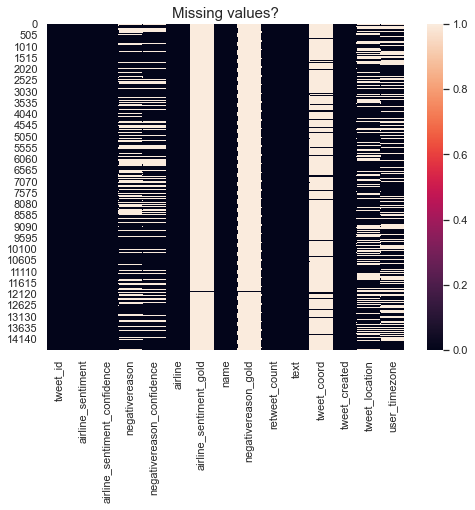

In [635]:
 #Visualization of missing value using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(tweet.isnull())                                 
plt.title("Missing values?", fontsize = 15)
plt.show()

In [636]:
# Function for printing missing and zero values in each column with missing data
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Number of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(tweet)

Your selected dataframe has 15 columns and 14640 Rows.
There are 7 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
negativereason_gold,0,14608,99.8,14608,99.8,object
airline_sentiment_gold,0,14600,99.7,14600,99.7,object
tweet_coord,0,13621,93.0,13621,93.0,object
negativereason,0,5462,37.3,5462,37.3,object
user_timezone,0,4820,32.9,4820,32.9,object
tweet_location,0,4733,32.3,4733,32.3,object
negativereason_confidence,1344,4118,28.1,5462,37.3,float64


<font color = 'green'>
<font size =1 >
# Observations :


<font color = 'green'>
<font size =1 >
negativereason_gold, airline_sentiment_gold, tweet_coord has more than 90% missing data hence these columns will be deleted.

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [637]:
# Detailed summary of the data set
tweet.describe(include = 'all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. `airline_sentiment` has 3 unique values. With `negative` as maximum.
2. airline_sentiment_confidence has values from 0.3 to 1
3. negativereason , most repeated reason for negative sentiment is Customer service issue. There are 10 unique reasons in this column.
4. This data consistes of information from 6 different airlines, with maximum referring to United.
5. In the name column, there are no missing values and 7701 unique values, suggesting some of the twitter comments are repeated by same customers.
6. Retweet count varies from 0 to 44.
7. Most frequent tweet location is Boston,MA and in Eastern Time(US and Canada)

<font color=darkorange>
<font size =4.5>
1.3.7 Removing redundant columns

In [638]:
#Drop the column which have got too many missing values or does not have relevent information
tweet.drop(['tweet_id', 'airline_sentiment_gold','negativereason_gold','name','tweet_coord','tweet_location'],axis=1,inplace=True)
tweet.shape

(14640, 9)

<font color=darkorange>
<font size =4.5>
1.3.8 Separating Year, Month, Date and Time from the tweet_created time stamp

In [639]:
# Separating Year, Month, Date and Time from the tweet_created time stamp
year=[]
month=[]
date=[]
hour=[]
for x in tweet['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

tweet['year']=year
tweet['month']=month
tweet['dates']=date
tweet['hour']=hour
tweet.head(10)


,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,retweet_count,text,tweet_created,user_timezone,year,month,dates,hour
0,neutral,1.0000,NaN,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada),2015,2,24,11
1,positive,0.3486,NaN,0.0000,Virgin America,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada),2015,2,24,11
2,neutral,0.6837,NaN,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Central Time (US & Canada),2015,2,24,11
3,negative,1.0000,Bad Flight,0.7033,Virgin America,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada),2015,2,24,11
4,negative,1.0000,Can't Tell,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada),2015,2,24,11
5,negative,1.0000,Can't Tell,0.6842,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 11:14:33 -0800,Pacific Time (US & Canada),2015,2,24,11
6,positive,0.6745,NaN,0.0000,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 11:13:57 -0800,Pacific Time (US & Canada),2015,2,24,11
7,neutral,0.6340,NaN,NaN,Virgin America,0,@VirginAmerica Really missed a prime opportuni...,2015-02-24 11:12:29 -0800,Pacific Time (US & Canada),2015,2,24,11
8,positive,0.6559,NaN,NaN,Virgin America,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",2015-02-24 11:11:19 -0800,Pacific Time (US & Canada),2015,2,24,11
9,positive,1.0000,NaN,NaN,Virgin America,0,"@VirginAmerica it was amazing, and arrived an ...",2015-02-24 10:53:27 -0800,Eastern Time (US & Canada),2015,2,24,10


<font color=darkorange>
<font size =4.5>
1.3.9 Checking Unique value in each column

In [640]:
# Unique category in each coulmn
for i in tweet.columns:
    print(tweet[i].value_counts())
    print("*" * 50)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64
**************************************************
1.0000    10445
0.6667       71
0.6632       35
0.6559       30
0.6596       30
          ...  
0.3913        1
0.7273        1
0.6353        1
0.6260        1
0.3544        1
Name: airline_sentiment_confidence, Length: 1023, dtype: int64
**************************************************
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64
**************************************************
1.0000    3436
0.0000    1344
0.6667      62
0.6632      33
0.6596      29
          ... 
0.3386       1
0.3577       1
0.32

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. `airline_sentiment` has 3 unique values. with negative: 9178, neutral: 3099, positive: 2363.
2. airline_sentiment_confidence has values from 0.3 to 1. With max having confidence of 1.
3. negativereason , most repeated reason for negative sentiment is Customer service issue, repeats 2910 times. Followed by 'Late Flight' , 'Can't Tell', 'Cancelled Flight', 'Lost luggage' .There are 10 unique reasons in this column. Least common reason is Dammaged Luggage .
4. This data consistes of information from 6 different airlines.Namely,United, US Airways, American, Southwest, Delta, Virgin America. With maximum tweets referring to United.
5. Retweet count varies from 0 to 44.One tweet has 44 retweets, we can check the tweet in further EDA analysis.
6. Year and Month column are same as this data is collected from february 2015, hence has no usefull EDA information and these columns can be deleted.
7. Most frequent tweet time zone in Eastern Time, followed by Central Time.

<font color=darkorange>
<font size =4.5>
1.3.10 Removing redundant columns Year and Month

In [641]:
#Drop the column which have got too many missing values or does not relevent information
tweet.drop(['year','month'],axis=1,inplace=True)
tweet.shape

(14640, 11)

<font color = 'green'>
<font size =1 >
Note : Year and month are same so deleting those columns allong with tweet created

<font color=darkorange>
<font size =4.5>
1.3.11 Summary of the Data Set after removing unwanted coloumns

In [642]:
# Data description of numerical columns
tweet.describe()                                               

,airline_sentiment_confidence,negativereason_confidence,retweet_count,dates,hour
count,14640.000000,10522.000000,14640.000000,14640.000000,14640.000000
mean,0.900169,0.638298,0.082650,20.947473,12.319945
std,0.162830,0.330440,0.745778,2.170646,5.306285
min,0.335000,0.000000,0.000000,16.000000,0.000000
25%,0.692300,0.360600,0.000000,19.000000,8.000000
50%,1.000000,0.670600,0.000000,22.000000,12.000000
75%,1.000000,1.000000,0.000000,23.000000,17.000000
max,1.000000,1.000000,44.000000,24.000000,23.000000


In [643]:
# Data description of categorical columns
tweet.describe(include=['object']).T

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
text,14640,14427,@united thanks,6
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
user_timezone,9820,85,Eastern Time (US & Canada),3744


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. `airline_sentiment` has 3 unique values. With `negative` as maximum.
2. airline_sentiment_confidence has values from 0.3 to 1
3. negativereason , most repeated reason for negative sentiment is Customer service issue. There are 10 unique reasons in this column.
4. This data consistes of information from 6 different airlines, with maximum referring to United.
5. In the name column, there are no missing values and 7701 unique values, suggesting some of the twitter comments are repeated by same customers.
6. Retweet count varies from 0 to 44.
7. Most frequent tweet location is Boston,MA and in Eastern Time(US and Canada)

<font color=darkcyan>
<font size =5>
1.4 Exploratory Data Analysis

<font color=darkorange>
<font size =4.5>
1.4.1 Checking the Maximum retweeted tweet

In [644]:
print(tweet.iloc[tweet['retweet_count'].idxmax()]['text'])    # Most retweeted tweet 
print(tweet.iloc[tweet['retweet_count'].idxmax()]['tweet_created'])   # Time stamp of the most retweeted tweet
print(tweet.iloc[tweet['retweet_count'].idxmax()]['retweet_count'])  # Number of times the tweet was repeated


@USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)
2015-02-17 20:06:21 -0800
44


<font color=green>
<font size =1>
# Observations : As we can see from the tweet that a five hour flight Delay was the cause of most dicontent among customers on 17th of February and that is the tweet that has been retweeted 44 times.

<font color=darkorange>
<font size =4.5>
1.4.2 Checking the number of characters used in tweets with different sentiments.

Text(0.5, 0.98, 'Characters in message')

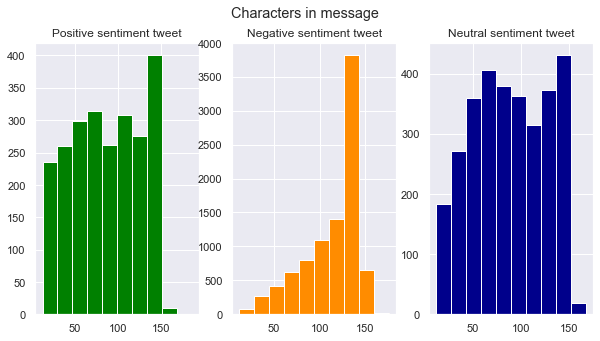

In [645]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = tweet[tweet['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='green')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweet[tweet['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='darkorange')
ax2.set_title('Negative sentiment tweet')
tweet_len = tweet[tweet['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='darkblue')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Characters in message')

<font color=green>
<font size =1>
# Observations : As we can see from the graphs, negative sentiment tweets have least characters as compared to positive and Neutral sentiment tweets.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking the number of words used in tweets with different sentiments.

Text(0.5, 0.98, 'Words in a tweet')

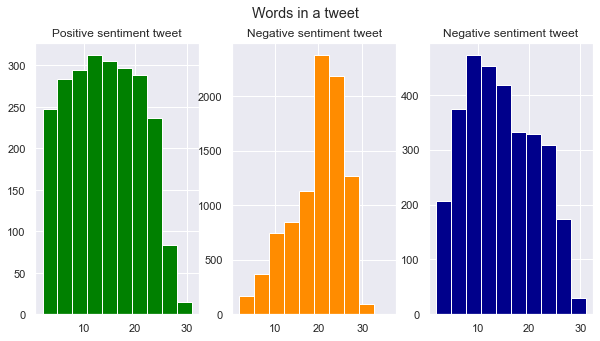

In [646]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = tweet[tweet['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='green')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweet[tweet['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='darkorange')
ax2.set_title('Negative sentiment tweet')
tweet_len = tweet[tweet['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='darkblue')
ax3.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

<font color=green>
<font size =1>
# Observations : As we can see from the graphs, negative sentiment tweets have less words as compared to positive and neutral tweets.

<font color=darkorange>
<font size =4.5>
1.4.4 Checking the time when most tweets were posted

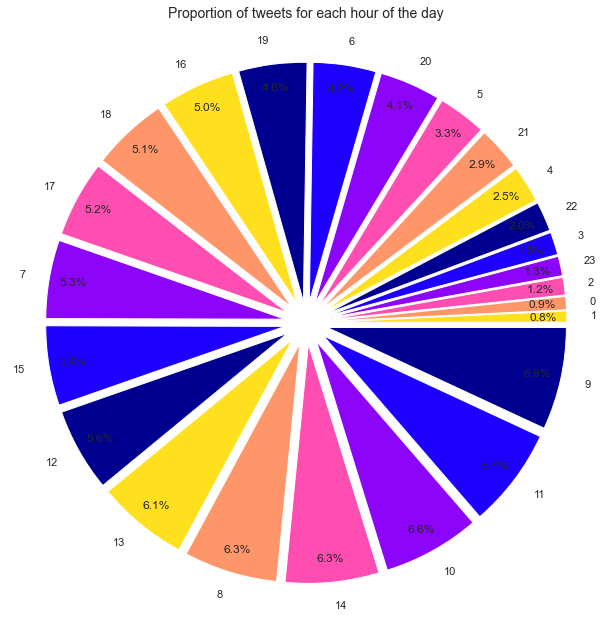

In [714]:
# Pie chart of time vs number of tweets
Category=tweet['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

<font color=green>
<font size =1>
# Observations : Maximum tweets are in day time from morning 9A.M to 4P.M

<font color=darkorange>
<font size =4.5>
1.4.5 Checking the dates when most tweets were posted

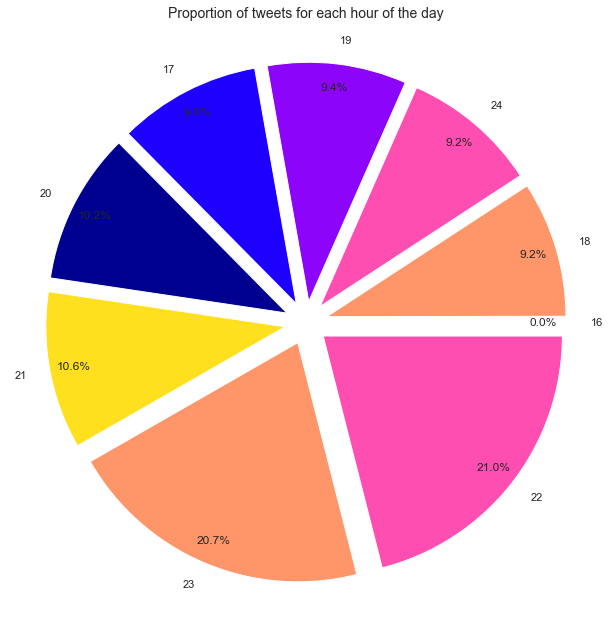

In [715]:
# Pie chart of dates vs number of tweets
Category=tweet['dates'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*9, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

<font color=green>
<font size =1>
# Observations : Maximum tweets are on dates 22 and 23. Almost 50 % of the total tweets are between 21st and 23rd.

<font color=darkorange>
<font size =4.5>
1.4.6 Checking the day on which tweets were posted

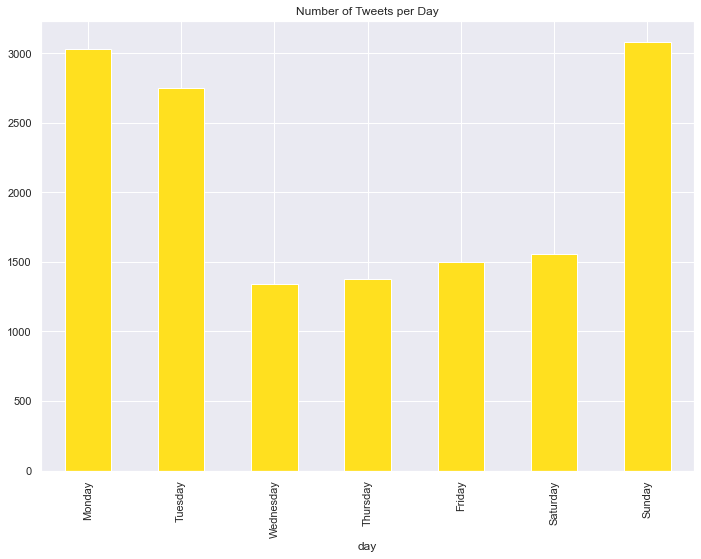

In [716]:
# Bar chart of number of tweets on a given day
data['tweet_created'] = pd.to_datetime(data['tweet_created']) # To make sure that pandas understands it's a date
plt.figsize = (16,10)

plt.title("Number of Tweets per Day")
tweet_cpt = data["tweet_created"].groupby(data["tweet_created"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")   #Assigning each day of the week as index
plt.xlabel("day")
plt.show()

<font color=green>
<font size =1>
# Observations : Maximum tweets are on sunday and monday, closely followed by tuesday

<font color=darkorange>
<font size =4.5>
1.4.7 Checking the sentiments with respect to the day

In [650]:
# copying data to another variable to avoid any changes to original data
tweet_day = data.copy()

In [651]:
tweet_day['day_of_week'] = tweet_day['tweet_created'].dt.day_name()

In [652]:
def stacked_plot(x):
    
    sns.set(palette="gnuplot2_r")
    tab1 = pd.crosstab(x, tweet_day["airline_sentiment"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, tweet_day["airline_sentiment"], normalize="index",)
    tab.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  
    plt.show()

airline_sentiment  negative  neutral  positive    All
day_of_week                                          
Friday                  835      383       282   1500
Monday                 1922      677       433   3032
Saturday               1049      278       230   1557
Sunday                 2266      463       350   3079
Thursday                751      329       296   1376
Tuesday                1619      634       499   2752
Wednesday               736      335       273   1344
All                    9178     3099      2363  14640
------------------------------------------------------------------------------------------------------------------------


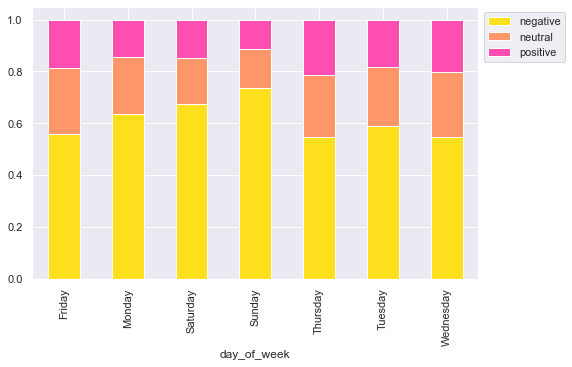

In [653]:
stacked_plot(tweet_day["day_of_week"])

<font color=green>
<font size =1>
# Observations : Maximum negative tweets are on weekend , that is saturday and sunday, Maximum positive tweets are on weekdays.

<font color=darkorange>
<font size =4.5>
1.4.7 Plotting the distribution of sentiment across all the tweets.

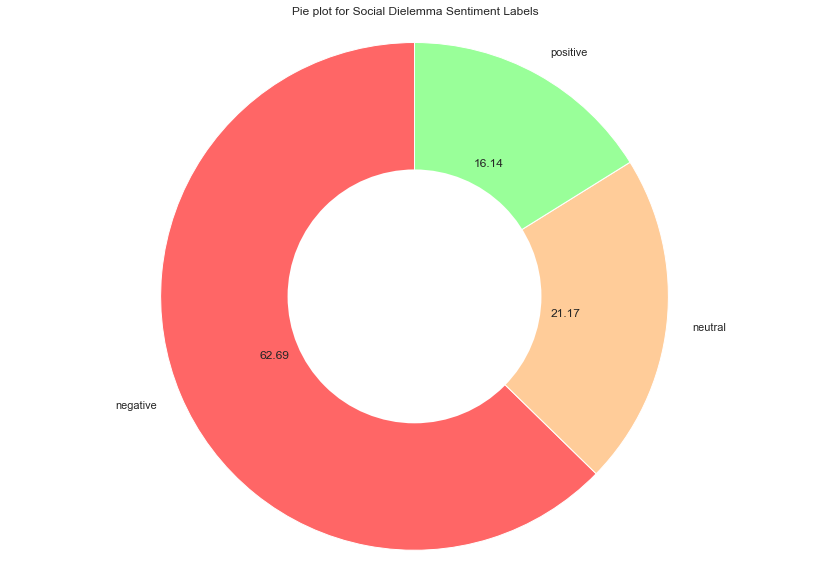

In [654]:
#plot for Airline Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(tweet['airline_sentiment'].value_counts(), labels=tweet['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for Social Dielemma Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

<font color=green>
<font size =1>
# Observations : 62% of the total tweets have negative sentiments, 21% neutral and only 16% positive.

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


Text(0.5, 1.0, 'Sentiment distribution in tweets')

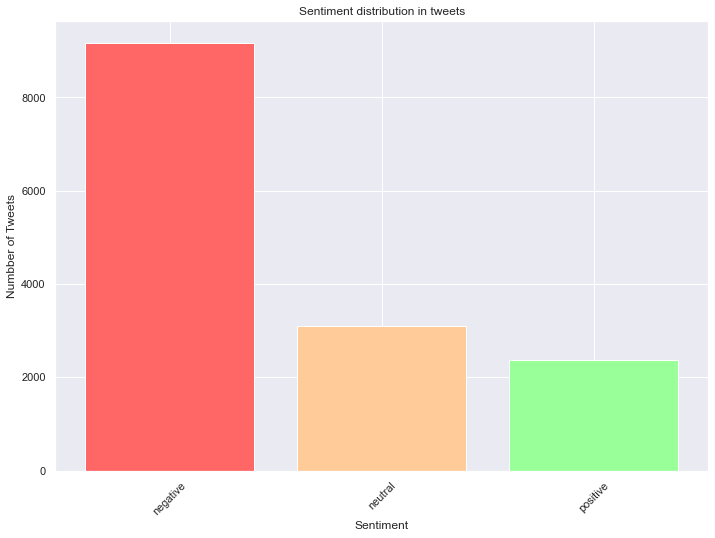

In [655]:
# Bar chart for Airline Sentiment
Index = [1,2,3]
print(tweet.airline_sentiment.value_counts())
plt.bar(Index,tweet.airline_sentiment.value_counts(), color =['#ff6666', '#ffcc99', '#99ff99'])
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Numbber of Tweets')
plt.xlabel('Sentiment')
plt.title('Sentiment distribution in tweets')

<font color=darkorange>
<font size =4.5>
1.4.8 Plotting the distribution of all tweets among each airline.
    

In [656]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

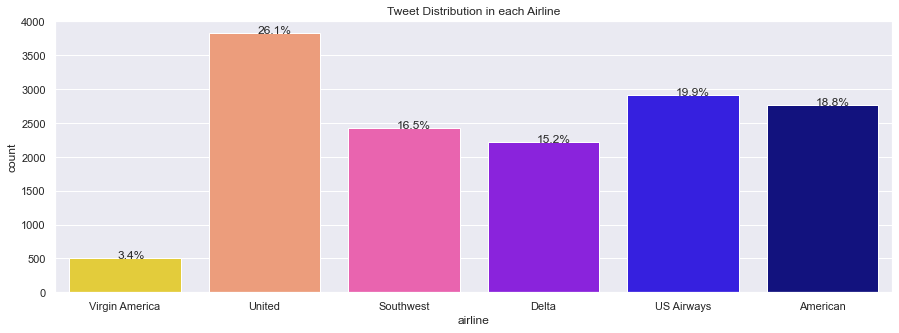

In [657]:
# PLot distribution of all tweets among each airline.

plt.figure(figsize=(15, 5))
plt.title('Tweet Distribution in each Airline')
ax = sns.countplot(
    tweet["airline"],
    palette="gnuplot2_r",
    
)
perc_on_bar(ax, tweet["airline"])

<font color=green>
<font size =1>
# Observations : United Airlines has the highest tweets and Virgin America has the lowest number of tweets. Rest of the airlines have almost the similar percentage of tweets.

<font color=darkorange>
<font size =4.5>
1.4.9 Plotting the distribution of Sentiment of tweets for each airline
    

In [658]:
# Tweet distribution among airlines with respect to airline sentiments
df=tweet.groupby(["airline","airline_sentiment"]).size().unstack()
print(df)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152


Text(0.5, 1.0, 'Tweet distribution in airline by sentiment')

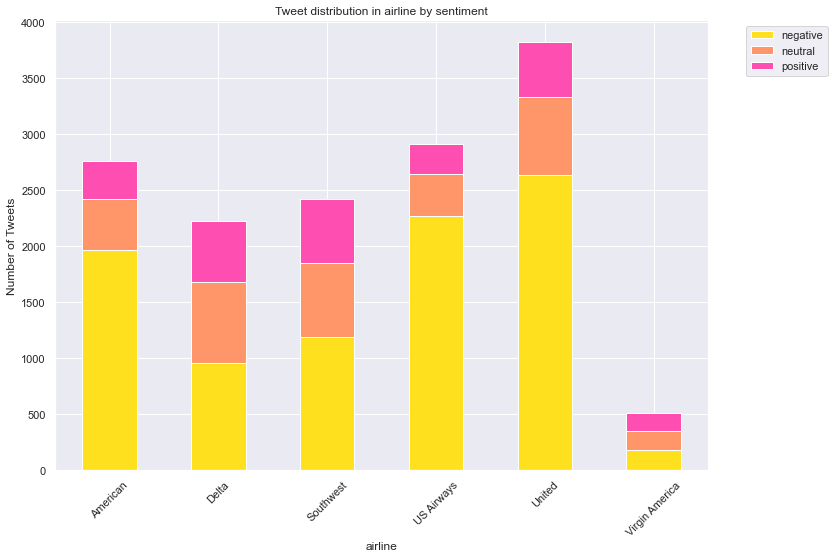

In [659]:
# Plot tweet distribution in airline by sentiment
sns.set(palette="gnuplot2_r")
ax=df.plot.bar(stacked=True)
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.title('Tweet distribution in airline by sentiment')

airline_sentiment  negative   neutral  positive
airline                                        
American           0.710402  0.167814  0.121783
Delta              0.429793  0.325383  0.244824
Southwest          0.490083  0.274380  0.235537
US Airways         0.776862  0.130793  0.092345
United             0.688906  0.182365  0.128728
Virgin America     0.359127  0.339286  0.301587


Text(0.5, 1.0, 'Normalized Tweet distribution in airline by sentiment')

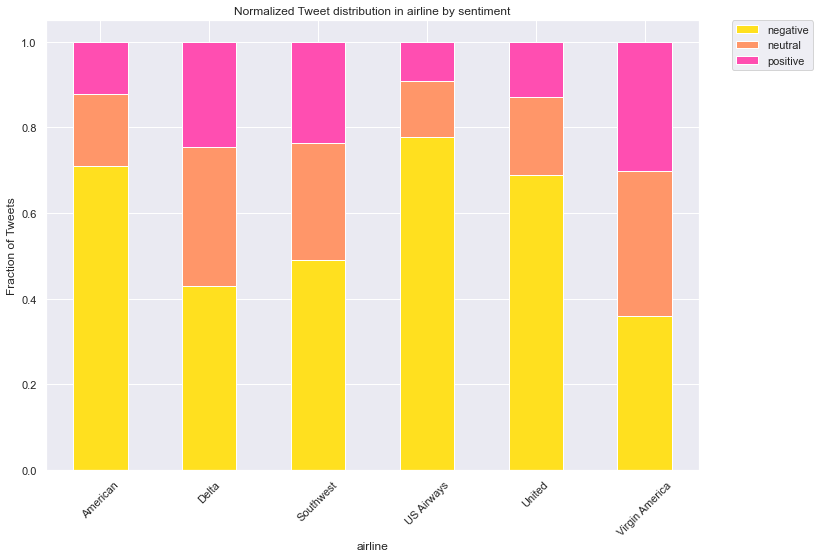

In [660]:
# Normalization
df=tweet.groupby(["airline","airline_sentiment"]).size().unstack()
df=df.div(df.sum(axis=1),axis='index')
print(df)
ax=df.plot.bar(stacked=True)
plt.ylabel('Fraction of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Normalized Tweet distribution in airline by sentiment')

<font color=green>
<font size =1>
# Observations : US Airways and American have maximum negative tweets. Virgin America, Delta and Southwest have maximum positive tweets.
   US Airways has least positive tweets

<font color=darkorange>
<font size =4.5>
1.4.10 Plotting the distribution of all the negative reasons

Text(0, 0.5, 'Number of Tweets')

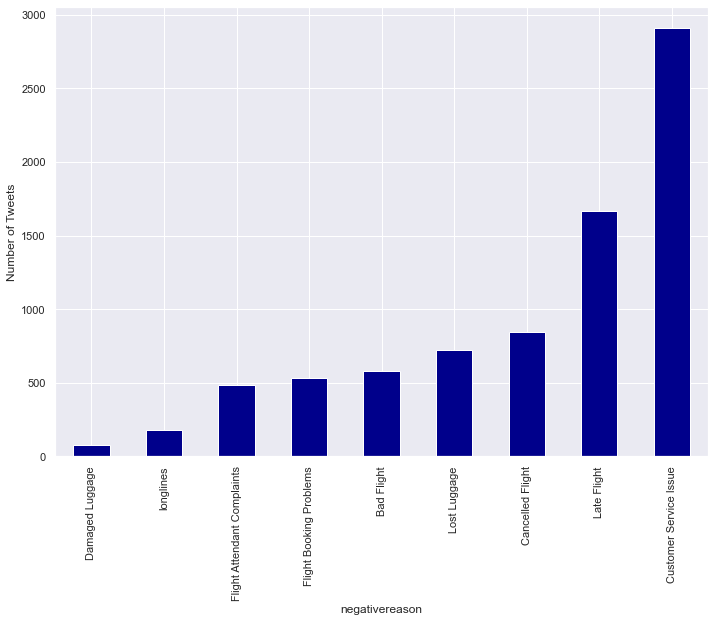

In [661]:
# PLot distribution of negative reasons
tweet_negative=tweet[(tweet.airline_sentiment=="negative") & (tweet.negativereason !="Can't Tell")]
df=tweet_negative.groupby(["negativereason"]).size().sort_values()
df.plot.bar(color ='darkblue')
plt.ylabel('Number of Tweets')

<font color=green>
<font size =1>
    
 Observations : `Customer service issue` is the main reason for negative sentiment, followed by `Late flight`. DAmaged Luggage and Long lines are least likely reasons for negative sentiment.

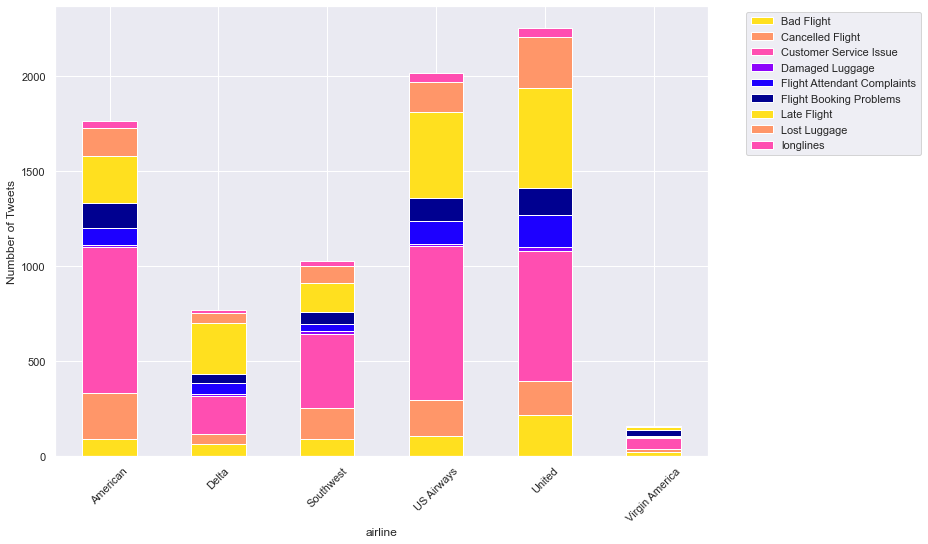

In [662]:
# PLot distribution of negative reasons by Airline
df1=tweet_negative.groupby(["airline","negativereason"]).size().unstack()
ax=df1.plot.bar(stacked=True)
plt.ylabel('Numbber of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

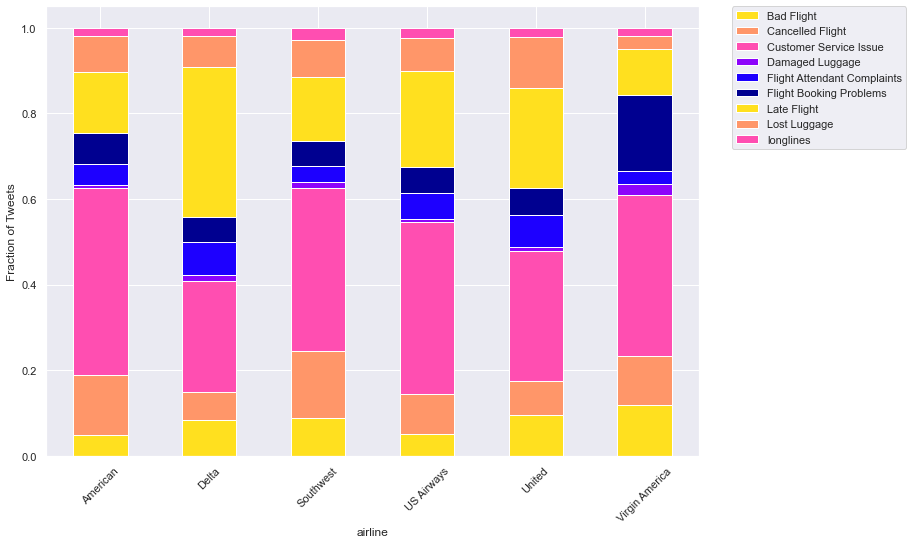

In [663]:
# Normalization
df3=tweet_negative.groupby(["airline","negativereason"]).size().unstack()
df3=df3.div(df3.sum(axis=1),axis='index')
ax=df3.plot.bar(stacked=True)
plt.ylabel('Fraction of Tweets')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. `Bad flight` is highest in Virgin America. Least in American
2. `Cancelled flight` is highest in Southwest followed by American. Least in Delta.
3. `Customer Service Issue` is highest in all airlines except Delta.
4. `Damaged Luggage` is very less in all airlines. Virgin America shows the maximum.
5. `Flight Attendant Complaints` is highest in Delta and United. Least in Southwest.
6. `Flight Booking Problems` are highest in Virgin America and least in Delta.
7. `Late flight` is highest in Delta and least in Virgin america.
8. `Lost Luggage` is highest in United and least in Virgin America.
9. `Long lines` is very low in all airlines. Maximum in Southwest

<font color=darkorange>
<font size =4.5>
1.4.11 Plotting the distribution of tweets by User name

In [664]:
tweet_name = data.copy()

In [665]:
# function to create labeled barplots
def labeled_barplot(data, feature,  title, pallet,perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(16, 4))
    else:
        plt.figure(figsize=(16, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data[feature],
        palette=pallet,
        order=data[feature].value_counts().index[:20],
    )
    ax.set_title('Frequency of {} tweeting about Social Dielamma'.format(title))

    for p in ax.patches:
        if perc == True:
            label = "{:1.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.4.11.1 Plotting the top 20 users by number of tweets

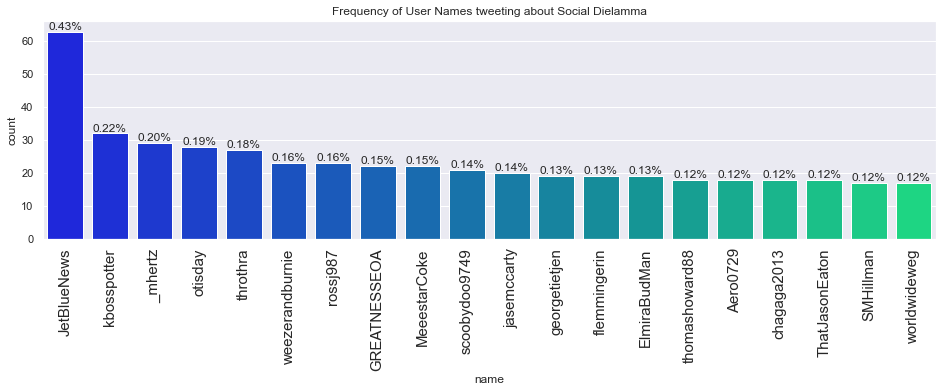

In [666]:
#Visualize the top 20 users by number of tweets
labeled_barplot(tweet_name, 'name', 'User Names','winter')

<font color=green>
<font size =1>
    
 Observations : JetBlueNews is the user who created the highest number of tweets in this dataset

<font color=darkorange>
<font size =4.5>
1.4.11.2 Plotting the top 20 users by number of negative tweets

In [667]:
# Separating Negative tweets
tweet_negative1=tweet_name[(tweet_name.airline_sentiment=="negative") & (tweet_name.negativereason !="Can't Tell")]

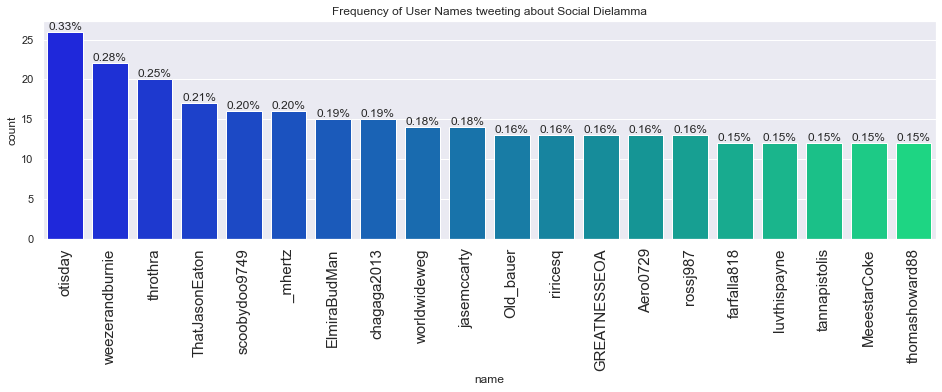

In [668]:
#Visualize the top 20 sources by number of tweets
labeled_barplot(tweet_negative1, 'name','User Names', 'winter')

<font color=green>
<font size =1>
    
 Observations : Highest proportion of negative tweets are done by  user 'disday' , followed by 'weezerandburnie'

<font color=darkorange>
<font size =4.5>
1.4.11.3 Plotting the top 20 tweet locations based on the number of tweets

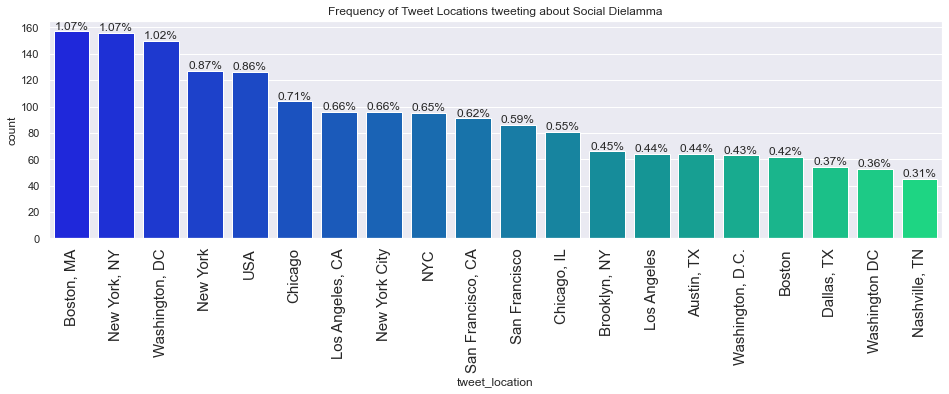

In [669]:
#Top 20 Users location based on the number of tweets¶
labeled_barplot(tweet_name, 'tweet_location', 'Tweet Locations', 'winter')

<font color=green>
<font size =1>
    
 Observations :Boston, New York and Washington D.C. have highest number of tweets originating.

<font color=darkorange>
<font size =4.5>
1.4.11.4 Plotting the top 20 user timezone based on the number of tweets

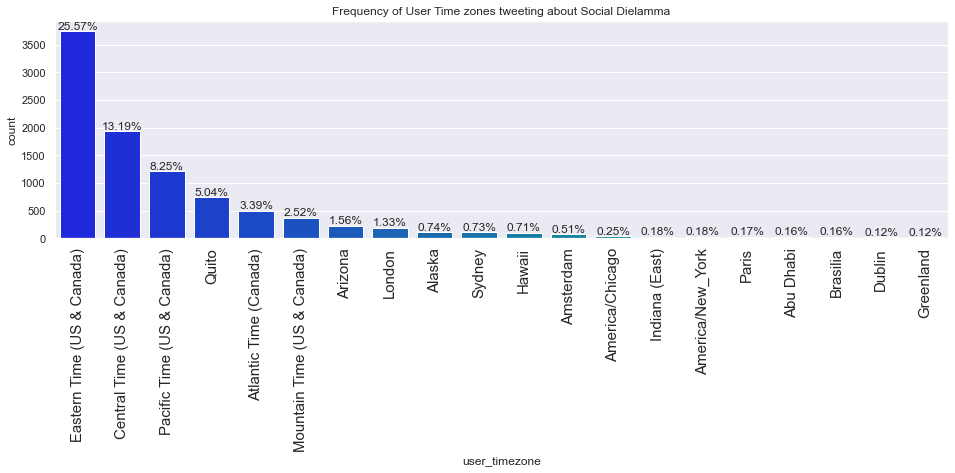

In [670]:
#Top 20 Users location based on the number of tweets¶
labeled_barplot(tweet_name, 'user_timezone', 'User Time zones', 'winter')

<font color=green>
<font size =1>
    
 Observations : Most users tweeting are from EST, CST and PST time zone.

<font color=darkcyan>
<font size =5>
1.5 Understanding of Data Columns

In [671]:
# copying data to another variable to avoid any changes to original data
tweet_pre = tweet.copy()


<font color=darkorange>
<font size =4.5>
1.5.1 Drop all other columns except “text” and “airline_sentiment”

In [672]:
#Drop the column 
tweet_pre = tweet[['text','airline_sentiment']]

<font color=green>
<font size =1>
    
 Observations : Dropped all columns except text and airline sentiment

<font color=darkorange>
<font size =4.5>
1.5.2 Check the shape of the data.

In [673]:
tweet_pre.shape

(14640, 2)

<font color=green>
<font size =1>
    
 Observations : The dataset now has only 2 columns and 14640 rows

<font color=darkorange>
<font size =4.5>
1.5.3 View the first 5 rows of data.

In [674]:
tweet_pre.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


<font color=darkcyan>
<font size =5>
1.6 Data Pre-Processing

<font color=darkorange>
<font size =4.5>
1.6.1 Text Preprocessing - Html tag removal

In [675]:
# Removal of the http link using Regular Expression.
for i, row in tweet_pre.iterrows():
    clean_tweet = re.sub(r"http\S+", "", tweet_pre.at[i, 'text'])
    tweet_pre.at[i,'text'] = clean_tweet
tweet_pre.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


<font color=darkorange>
<font size =4.5>
1.6.2 Text Preprocessing - De-contraction of words

In [676]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in tweet_pre.iterrows():
    content = tweet_pre.at[i, 'text']
    clean_content = replace_contractions(content)
    tweet_pre.at[i,'text'] = clean_content
tweet_pre.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


<font color=darkorange>
<font size =4.5>
1.6.3 Text Preprocessing - Removal of number

In [677]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text

tweet_pre['text'] = tweet_pre['text'].apply(lambda x: remove_numbers(x))
tweet_pre.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


<font color=darkorange>
<font size =4.5>
1.6.4 Text Preprocessing - Tokenization

In [678]:
tweet_pre['text'] = tweet_pre.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweet_pre.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


<font color=darkorange>
<font size =4.5>
1.6.5 Text Preprocessing - Remove non-ascii character

In [679]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [680]:
tweet_pre['text'] = tweet_pre['text'].apply(lambda x: remove_non_ascii(x))
tweet_pre.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,"[@, VirginAmerica, and, it, is, a, really, big...",negative


<font color=darkorange>
<font size =4.5>
1.6.6 Text Preprocessing - Conversion to lowercase

In [681]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [682]:
tweet_pre['text'] = tweet_pre['text'].apply(lambda x: to_lowercase(x))
tweet_pre.head()

,text,airline_sentiment
0,"[@, virginamerica, what, @, dhepburn, said, .]",neutral
1,"[@, virginamerica, plus, you, have, added, com...",positive
2,"[@, virginamerica, i, did, not, today, ..., mu...",neutral
3,"[@, virginamerica, it, is, really, aggressive,...",negative
4,"[@, virginamerica, and, it, is, a, really, big...",negative


<font color=darkorange>
<font size =4.5>
1.6.7 Text Preprocessing - Removal of Punctuation

In [683]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [684]:
tweet_pre['text'] = tweet_pre['text'].apply(lambda x: remove_punctuation(x))
tweet_pre.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, you, have, added, commer...",positive
2,"[virginamerica, i, did, not, today, must, mean...",neutral
3,"[virginamerica, it, is, really, aggressive, to...",negative
4,"[virginamerica, and, it, is, a, really, big, b...",negative


<font color=darkorange>
<font size =4.5>
1.6.8 Text Preprocessing - Removal of stopwords

In [688]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [689]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [690]:
tweet_pre['text'] = tweet_pre['text'].apply(lambda x: remove_stopwords(x))
tweet_pre.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercials, expe...",positive
2,"[virginamerica, today, must, mean, need, take,...",neutral
3,"[virginamerica, really, aggressive, blast, obn...",negative
4,"[virginamerica, really, big, bad, thing]",negative


<font color=darkorange>
<font size =4.5>
1.6.9 Text Preprocessing - Lemmatization

In [691]:
lemmatizer = WordNetLemmatizer()

In [692]:
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word))
    return new_words

tweet_pre['text'] = tweet_pre['text'].apply(lambda x: lemmatize_list(x))
tweet_pre.head()

,text,airline_sentiment
0,"[virginamerica, dhepburn, said]",neutral
1,"[virginamerica, plus, added, commercial, exper...",positive
2,"[virginamerica, today, must, mean, need, take,...",neutral
3,"[virginamerica, really, aggressive, blast, obn...",negative
4,"[virginamerica, really, big, bad, thing]",negative


<font color=darkorange>
<font size =4.5>
1.6.9 Text Preprocessing - Normalization(aggregating pre-processing function into one)

In [693]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

tweet_pre['text'] = tweet_pre.apply(lambda row: normalize(row['text']), axis=1)
tweet_pre.head()

,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercial experience...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


<font color=darkcyan>
<font size =5>
1.7 Word Cloud Graph

<font color=darkorange>
<font size =4.5>
1.7.1 Viewing the most Common words in content column

In [694]:
# copying data to another variable to avoid any changes to original data
tweet_words = tweet_pre.copy()

In [695]:
tweet_words['text'] = tweet_words.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in tweet_words['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,4569
1,united,4161
2,usairways,3051
3,americanair,2962
4,southwestair,2461
5,jetblue,2395
6,get,1376
7,hour,1161
8,thanks,1080
9,cancelled,1056


<font color=green>
<font size =1>
    
 Observations : The most common word is `flight` followed by `united`.

<font color=darkorange>
<font size =4.5>
1.7.2 Viewing the Most common words in the positive and negative sentiments tweets

In [696]:
Positive_sent = tweet_words[tweet_words['airline_sentiment']=='positive']
Negative_sent = tweet_words[tweet_words['airline_sentiment']=='negative']
Neutral_sent = tweet_words[tweet_words['airline_sentiment']=='neutral']

In [697]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178
Number of tweets with neutral sentiment 3099


<font color=darkorange>
<font size =4.5>
1.7.2.1 Finding common words for positive sentiment tweets

In [698]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['text'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,thanks,610
1,jetblue,595
2,southwestair,576
3,united,528
4,thank,453
5,flight,436
6,americanair,355
7,usairways,276
8,great,236
9,service,163


<font color=green>
<font size =1>
    
 Observations : The most common word is `thanks` in `positive` sentiment tweets

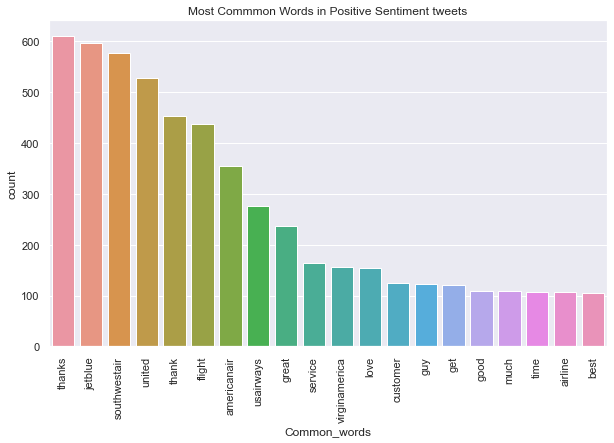

In [699]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

<font color=darkorange>
<font size =4.5>
1.7.2.2 Finding common words for neutral sentiment tweets

In [700]:
#MosT common neutral words
top = Counter([item for sublist in Neutral_sent['text'] for item in sublist])
freq_neutral = pd.DataFrame(top.most_common(20))
freq_neutral.columns = ['Common_words','count']
freq_neutral.style.background_gradient(cmap='pink_r')

,Common_words,count
0,flight,775
1,jetblue,748
2,united,737
3,southwestair,671
4,americanair,499
5,usairways,401
6,get,241
7,please,181
8,need,180
9,virginamerica,177


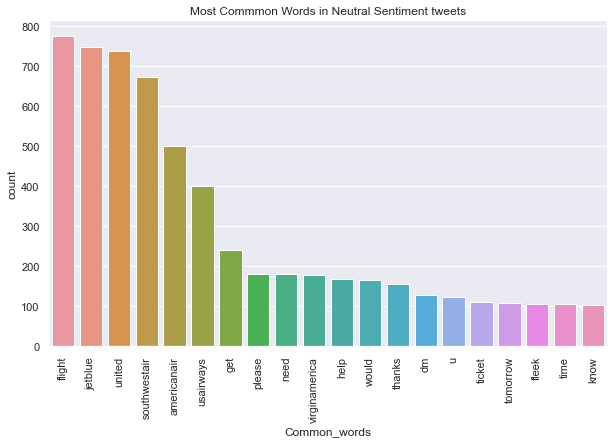

In [701]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_neutral, ax=ax)
plt.title("Most Commmon Words in Neutral Sentiment tweets")
plt.xticks(rotation='vertical');

<font color=green>
<font size =1>
    
 Observations : The most common word is `flight` in `neutral` sentiment tweets

<font color=darkorange>
<font size =4.5>
1.7.2.3 Finding common words for negative sentiment tweets

In [702]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='flare')

,Common_words,count
0,flight,3358
1,united,2896
2,usairways,2374
3,americanair,2108
4,southwestair,1214
5,hour,1107
6,jetblue,1052
7,get,1015
8,cancelled,920
9,customer,776


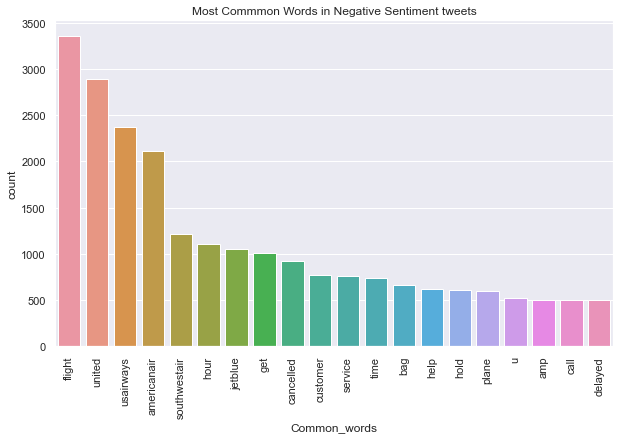

In [703]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

<font color=green>
<font size =1>
    
 Observations : The most common word is `flight` in `negative` sentiment tweets

<font color=darkorange>
<font size =4.5>
1.7.3  Plot the word cloud graph of tweets 

In [704]:
import wordcloud
def show_wordcloud(sent, title):
    text = ' '.join(sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

<font color=darkorange>
<font size =4.5>
1.7.3.1  Positive Tweet Cloud

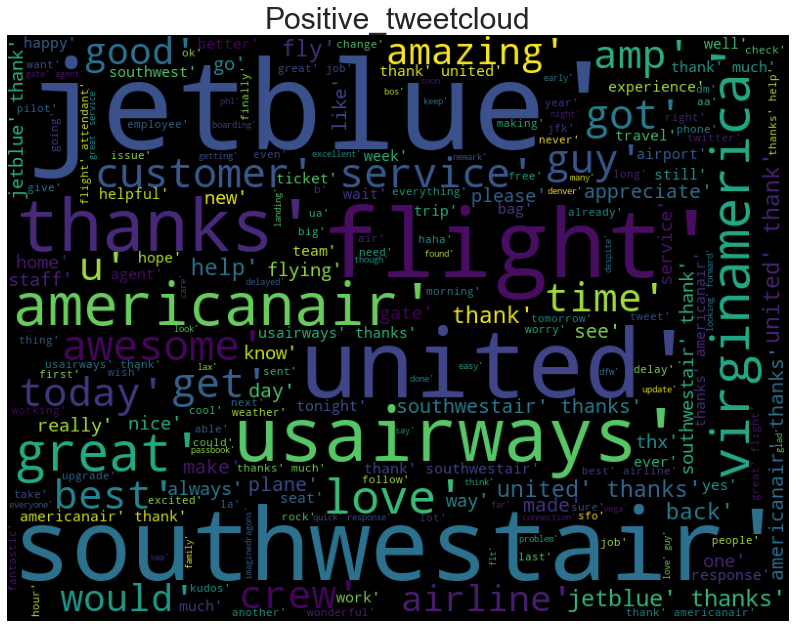

In [705]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")


<font color=green>
<font size =1>
    
 Observations : Words like "thanks", "customer service", "awesome", "best airline","nice travel", "good", "amazing" are highlighted in positive sentiment cloud. Airlines most highlighted in positive cloud are southwest, united and jet blue.

<font color=darkorange>
<font size =4.5>
1.7.3.2  Negative Tweet Cloud

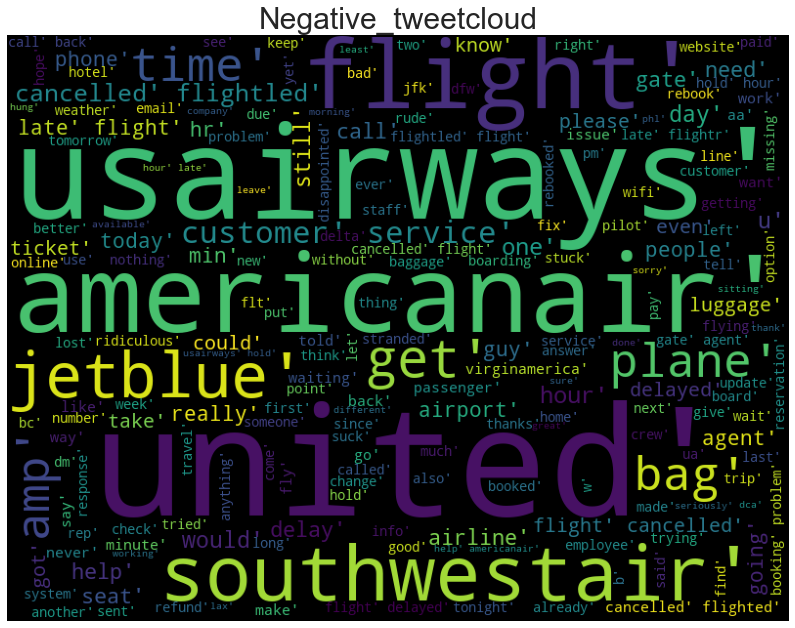

In [706]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")


<font color=green>
<font size =1>
    
 Observations : Words like "cancelled", "waiting", "agent response", "customer service","delayed", "never", "lost" are highlighted in negative sentiment cloud. Airlines most highlighted in negative cloud are us airways, united, american

<font color=darkorange>
<font size =4.5>
1.7.3.3  Neutral Tweet Cloud

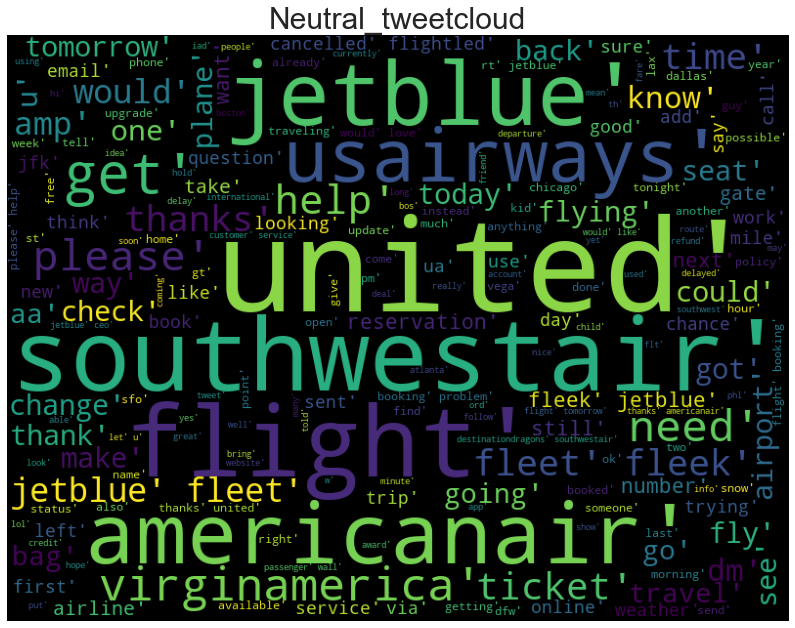

In [707]:
show_wordcloud(Neutral_sent, "Neutral_tweetcloud")


<font color=green>
<font size =1>
    
 Observations : Words like "ticket", "fleet", "bag ", "fly","time", "change", "help" are highlighted in neutral sentiment cloud. 

<font color=darkorange>
<font size =4.5>
1.7.3.4  Negative Reason word Cloud

In [711]:

tweet_negative['negativereason'] = tweet_negative.apply(lambda row: nltk.word_tokenize(row['negativereason']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['negativereason'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='black',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

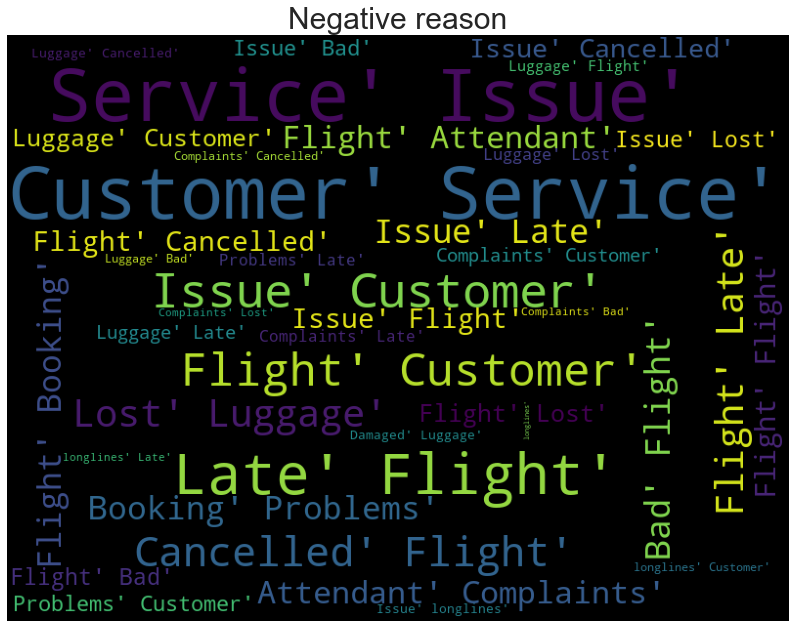

In [712]:
show_wordcloud(tweet_negative,'Negative reason')


<font color=green>
<font size =1>
    
 Observations : Words like "Service issue", "Late flight", "Booking Problems ", "cancelled" are highlighted in negative reason word cloud. 

<font color=darkcyan>
<font size =5>
1.8 Model Building

<font color=darkorange>
<font size =4.5>
1.8.1 Build a classification model based on CountVectorizer and Random Forest
    
    

In [581]:
# copying data to another variable to avoid any changes to original data
tweet_model = tweet_pre.copy()

In [582]:
tweet_model

,text,airline_sentiment
0,virginamerica dhepburn said,neutral
1,virginamerica plus added commercial experience...,positive
2,virginamerica today must mean need take anothe...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
...,...,...
14635,americanair thank got different flight chicago,positive
14636,americanair leaving minute late flight warning...,negative
14637,americanair please bring american airline blac...,neutral
14638,americanair money change flight answer phone s...,negative


<font color=darkorange>
<font size =4.5>
1.8.1.1 Apply Count vectorizer
    
    

In [583]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(tweet_model['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

<font color=darkorange>
<font size =4.5>
1.8.1.2 Shape of data after vectorization
    
    

In [584]:
data_features.shape

(14640, 2000)

<font color=darkorange>
<font size =4.5>
1.8.1.3 Split the data into train and test
    
    

In [585]:
X = data_features

y = tweet_model.airline_sentiment

In [586]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [587]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10248, 2000)
(4392, 2000)
(10248,)
(4392,)


<font color=darkorange>
<font size =4.5>
1.8.1.4 Fit the Model 
    
    

In [588]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, X, y, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6995901639344263


In [434]:
from sklearn.metrics import classification_report
print(classification_report(forest.predict(X_test),y_test))

              precision    recall  f1-score   support

    negative       0.86      0.81      0.83      3016
     neutral       0.44      0.51      0.48       765
    positive       0.58      0.66      0.62       611

    accuracy                           0.73      4392
   macro avg       0.63      0.66      0.64      4392
weighted avg       0.75      0.73      0.74      4392



<font color=darkorange>
<font size =4.5>
1.8.1.5 Tuning the Model :Optimizing the parameter: Number of trees in the random forest model(n_estimators)
   

In [603]:

# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 30)]


In [590]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

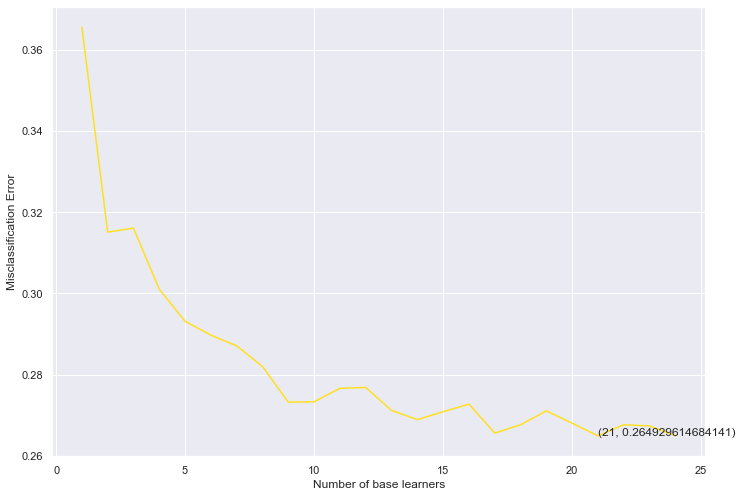

In [591]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [600]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = 26)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7511384335154827

In [604]:
print(classification_report(forest.predict(X_test),y_test))

              precision    recall  f1-score   support

    negative       0.87      0.81      0.84      3052
     neutral       0.44      0.51      0.47       748
    positive       0.58      0.68      0.62       592

    accuracy                           0.74      4392
   macro avg       0.63      0.67      0.64      4392
weighted avg       0.76      0.74      0.75      4392



In [601]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

<font color=darkorange>
<font size =4.5>
1.8.1.6 Plot Confusion Matrix
   

[[2479  233  102]
 [ 409  394   81]
 [ 169   99  426]]
0.7511384335154827


<AxesSubplot:>

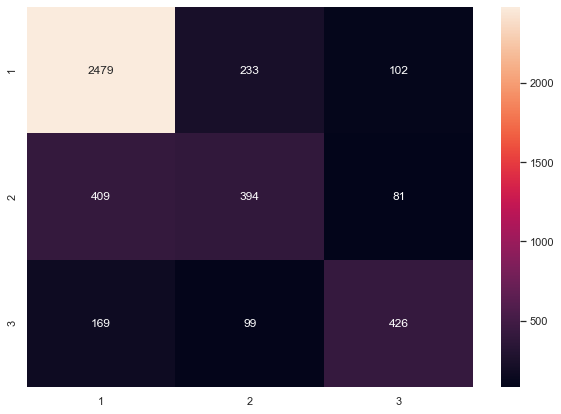

In [602]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

<font color=darkorange>
<font size =4.5>
1.8.1.7 Print and plot wordcloud of top 40 important features from the CountVectorizer + Random Forest based model
   

thank, thanks, hour, great, jetblue, usairways, flight, southwestair, united, love, customer, virginamerica, cancelled, bag, awesome, delayed, americanair, hold, get, service, time, amazing, please, dm, still, would, delay, airline, help, good, best, call, plane, hr, day, fleek, amp, follow, late, one, 


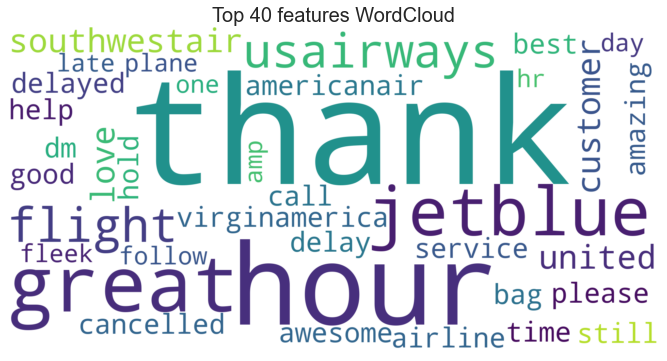

In [610]:


all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)
print(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

<font color=darkorange>
<font size =4.5>
1.8.2 Build a classification model based on Term Frequency(TF) - Inverse Document Frequency(IDF)

<font color=darkorange>
<font size =4.5>
1.8.2.1 Apply TF-IDF vectorizer

In [612]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features1 = vectorizer.fit_transform(tweet_model['text'])

data_features1 = data_features1.toarray()

data_features1.shape

(14640, 2000)

<font color=darkorange>
<font size =4.5>
1.8.2.2 Split the Dataset

In [613]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features1, y, test_size=0.3, random_state=42)

<font color=darkorange>
<font size =4.5>
1.8.2.3 Fit the model

In [614]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features1, y, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6794398907103825


In [604]:
print(classification_report(forest.predict(X_test),y_test))

              precision    recall  f1-score   support

    negative       0.87      0.81      0.84      3052
     neutral       0.44      0.51      0.47       748
    positive       0.58      0.68      0.62       592

    accuracy                           0.74      4392
   macro avg       0.63      0.67      0.64      4392
weighted avg       0.76      0.74      0.75      4392



<font color=darkorange>
<font size =4.5>
1.8.2.4 Tuning the model

In [617]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

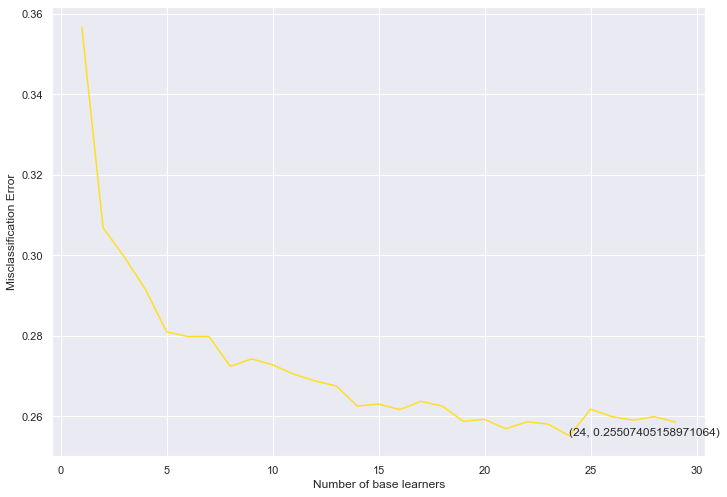

In [616]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [618]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7607012750455373

In [619]:
result = clf.predict(X_test)

In [620]:
print(classification_report(forest.predict(X_test),y_test))

              precision    recall  f1-score   support

    negative       0.92      0.79      0.85      3288
     neutral       0.40      0.57      0.47       623
    positive       0.50      0.72      0.59       481

    accuracy                           0.75      4392
   macro avg       0.61      0.69      0.64      4392
weighted avg       0.80      0.75      0.77      4392



<font color=darkorange>
<font size =4.5>
1.8.2.5 Confusion Matrix

[[2621  126   67]
 [ 479  339   66]
 [ 218   95  381]]
0.7607012750455373


<AxesSubplot:>

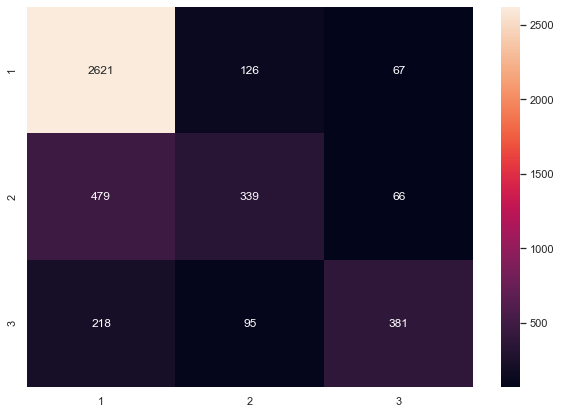

In [621]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [447]:
from sklearn.metrics import classification_report
print(classification_report(forest.predict(X_test),y_test))

              precision    recall  f1-score   support

    negative       0.92      0.78      0.84      3315
     neutral       0.39      0.57      0.46       600
    positive       0.52      0.75      0.61       477

    accuracy                           0.75      4392
   macro avg       0.61      0.70      0.64      4392
weighted avg       0.80      0.75      0.77      4392



<font color=darkorange>
<font size =4.5>
1.8.2.6 Print and plot wordcloud of top 40 important features from the TF-IDF Vectorizer + Random Forest based model
   

thanks, thank, jetblue, southwestair, united, americanair, usairways, great, flight, hour, virginamerica, cancelled, love, delayed, customer, amazing, hold, bag, awesome, get, dm, best, service, fleek, still, call, please, delay, would, plane, airline, appreciate, help, good, need, yes, one, today, time, day, 


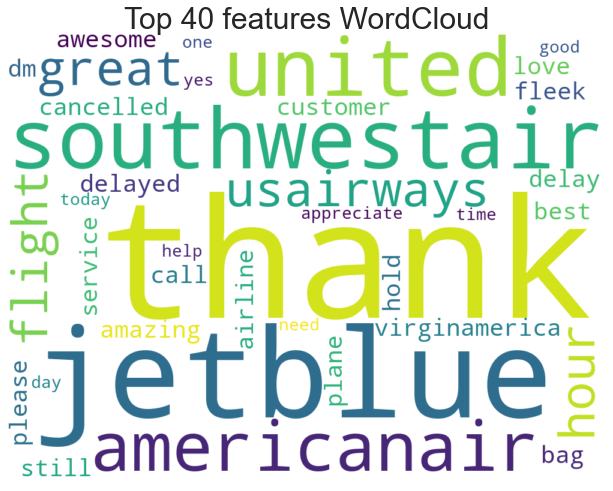

In [713]:

all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=', '

    
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=1000, 
                          height=750).generate(Top_features)
print(Top_features)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
    
**Key Observations**
    
    
1. The dataset used for airline sentiment analysis has tweets in text format and their sentiment analysis as positive,negative or neutral.
2. The primary objective of our project was to apply sentiment analysis to the US airline industry twitter data to understand the trends in customer perceptions about some of the biggest airline companies in the USA. Further, we will also investigate what factors drive positive and negative sentiments and how this would impact the overall industry.
3. The data analysis shows us there are few columns with missing values. The shape of data is 14640 rows and 15 columns.
4.`airline_sentiment` is our target column.
5. tweet id, and name are redundant columns. May be used for analysing how many users have tweeted multiple time, but is not ver useful for overall sentimnet analysis . Hence removing those two columns.
6. airline_sentiment_gold, negativereason_gold have too many missing columns hence deleting these two columns.
7. tweet_coord and tweet_location has lot of missing values,even the data available is too random, hence we will check their unique values and if not very relevant to sentiment analysis, we will remove these two columns.
8.negativereason_gold, airline_sentiment_gold, tweet_coord has more than 90% missing data hence these columns will be deleted.
9. airline_sentiment has 3 unique values. with negative: 9178, neutral: 3099, positive: 2363.
10. airline_sentiment_confidence has values from 0.3 to 1. With max having confidence of 1.
11. negativereason , most repeated reason for negative sentiment is Customer service issue, repeats 2910 times. Followed by 'Late Flight' , 'Can't Tell', 'Cancelled Flight', 'Lost luggage' .There are 10 unique reasons in this column. Least common reason is Dammaged Luggage .
12. This data consistes of information from 6 different airlines.Namely,United, US Airways, American, Southwest, Delta, Virgin America. With maximum tweets referring to United.
13. Retweet count varies from 0 to 44.One tweet has 44 retweets, we can check the tweet in further EDA analysis.
14. Year and Month column are same as this data is collected from february 2015, hence has no usefull EDA information and these columns can be deleted.
15. Most frequent tweet time zone in Eastern Time, followed by Central Time.
16. The tweet that a five hour flight Delay was the cause of most dicontent among customers on 17th of February and that is the tweet that has been retweeted 44 times.
17. negative sentiment tweets have least characters as compared to positive and Neutral sentiment tweets.
18. Maximum tweets are in day time from morning 9A.M to 4P.M
19. Maximum tweets are on dates 22 and 23. Almost 50 % of the total tweets are between 21st and 23rd.
20. Maximum tweets are on sunday and monday, closely followed by tuesday
21. Maximum negative tweets are on weekend , that is saturday and sunday, Maximum positive tweets are on weekdays.
22. 62% of the total tweets have negative sentiments, 21% neutral and only 16% positive.
23. United Airlines has the highest tweets and Virgin America has the lowest number of tweets. Rest of the airlines have almost the similar percentage of tweets.
24. US Airways and American have maximum negative tweets. Virgin America, Delta and Southwest have maximum positive tweets.US Airways has least positive tweets
25.`Customer service issue` is the main reason for negative sentiment, followed by `Late flight`. DAmaged Luggage and Long lines are least likely reasons for negative sentiment.
    
**Summary of Negative reasons**

1. `Bad flight` is highest in Virgin America. Least in American
2. `Cancelled flight` is highest in Southwest followed by American. Least in Delta.
3. `Customer Service Issue` is highest in all airlines except Delta.
4. `Damaged Luggage` is very less in all airlines. Virgin America shows the maximum.
5. `Flight Attendant Complaints` is highest in Delta and United. Least in Southwest.
6. `Flight Booking Problems` are highest in Virgin America and least in Delta.
7. `Late flight` is highest in Delta and least in Virgin america.
8. `Lost Luggage` is highest in United and least in Virgin America.
9. `Long lines` is very low in all airlines. Maximum in Southwest
    
**Summary of tweet user name and tweet location and time stamp**

1. JetBlueNews is the user who created the highest number of tweets in this dataset.
2. Highest proportion of negative tweets are done by user 'disday' , followed by 'weezerandburnie'
3. Boston, New York and Washington D.C. have highest number of tweets originating.
4. Most users tweeting are from EST, CST and PST time zone.
    
**Summary of Data Pre-Processing**

1. Dropped all columns except text and airline sentiment.The dataset now has only 2 columns and 14640 rows.
2. We pre-processed the data using various techniques and libraries.
3. We created a Word Cloud plot based on summary and high and low score.
4. The most common word is `flight` followed by `united`.
5. The most common word is `thanks` in `positive` sentiment tweets
6. The most common word is `flight` in `neutral` sentiment tweets
7. The most common word is `flight` in `negative` sentiment tweets
8. Words like "thanks", "customer service", "awesome", "best airline","nice travel", "good", "amazing" are highlighted in positive sentiment cloud. Airlines most highlighted in positive cloud are southwest, united and jet blue.
9. Words like "cancelled", "waiting", "agent response", "customer service","delayed", "never", "lost" are highlighted in negative sentiment cloud. Airlines most highlighted in negative cloud are us airways, united, american
10. Words like "ticket", "fleet", "bag ", "fly","time", "change", "help" are highlighted in neutral sentiment cloud.
11. Words like "Service issue", "Late flight", "Booking Problems ", "cancelled" are highlighted in negative reason word cloud.
    
    
**Summary of Vectorization and performance of the model**
    
1. The pre-processed data is converted to numbers (vectorized), so that we can feed the data into the model.
2. We trained the model and optimized the parameter, which led to an increase the overall accuracy.
3. After building the classification model, we predicted the results for the test data.
4. We saw that using the above techniques, our model performed well in perspective of how text classification models perform. WE got a 75% accuracy with CountVectorizer and 77% accuracy with TF-IDF Vectorizer on tuned Random forest classifiers.
5. However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building 
6. We can also increase the max_feature parameter in the vectorizer.
7. We can apply other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.

### <a id='link1'>Key Takeaways</a>

<font color = 'black'>

1) Most common reason for negative sentiment tweet among customers is  Customer Service Issue. This shows that even with unavoidable circumstances like flight delays and other issues if Airlines provide better customer service, customers are less likely to leave a negative tweet.
    
2) Maximum negative tweets are in weekends and maximum positive tweets on weekdays. This shows that the Airlines need to improve their services with the weekend travel rush and not let customer service be affected by increased travel traffic.
    
3) Southwest And american airlines have aximum negative comments due to cancelled flights. They need to work on reducing flight cancellations.
    
4) Virgin America airlines need to improve the flight experience for their customers based on the bad flight reviews given by maximum customers for this airline.
    
5) Delta Airlines needs to reduce delayed flights.
    
6) US Airways has maximum negative tweets , hence the need to improve overall flight experience for customers.
  